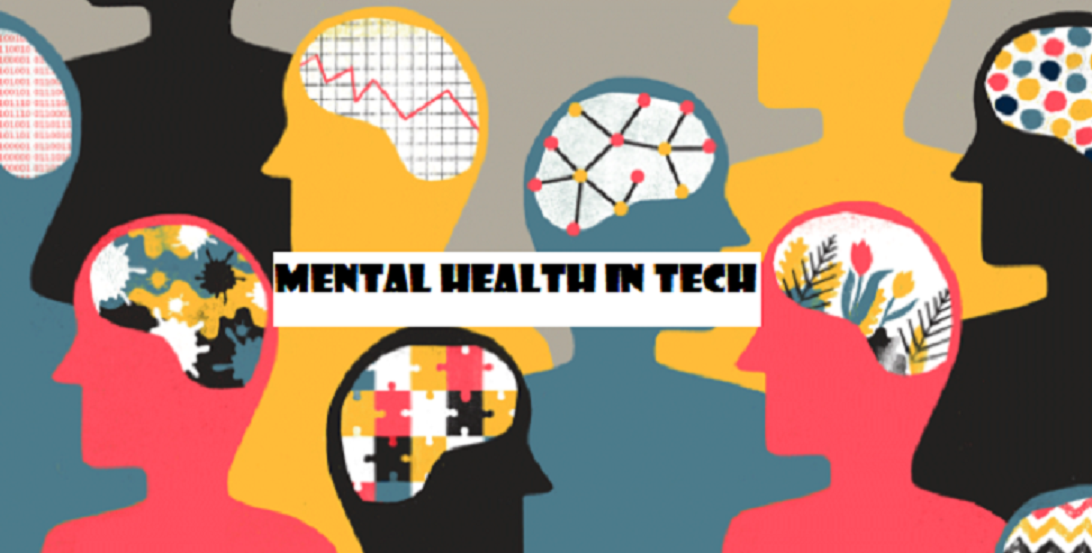

In [92]:
from IPython.display import Image
Image(filename='C:/Users/Aleena Omair/Desktop/2.png')

In [93]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print a confirmation message indicating that libraries were successfully imported
print('"Libraries successfully imported"')

"Libraries successfully imported"


In [94]:
# Load dataset from a CSV file into a DataFrame
df = pd.read_csv('C:/Users/Aleena Omair/Desktop/survey.csv')

# Display the first few rows of the DataFrame
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


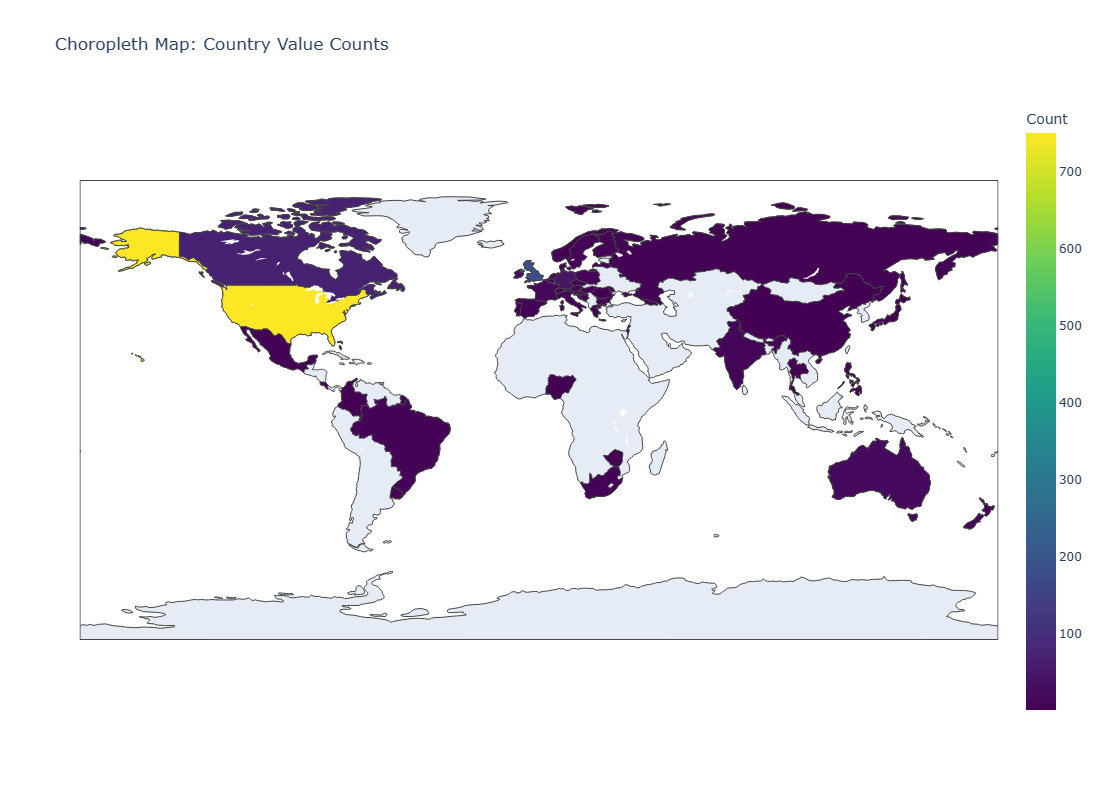

In [95]:
import plotly.express as px

# Get value counts of each country
country_value_counts = df['Country'].value_counts().reset_index()
country_value_counts.columns = ['Country', 'Count']

# Create a choropleth map using Plotly Express with built-in world map
fig = px.choropleth(
    country_value_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    color_continuous_scale='Viridis',
    title='Choropleth Map: Country Value Counts'
)
fig.update_layout(height=800, width=1000)
# Show the map
fig.show()


In [96]:
# Display summary statistics of the DataFrame using describe()
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [97]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(1259, 27)

In [98]:
# Display concise information about the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [99]:
# Check for the total number of missing data in the dataset

# Check if there is any missing data in the DataFrame
if df.isnull().sum().sum() == 0:
    print('There is no missing data in our dataset.')
else:
    # Print the total number of missing data in the dataset
    print('There is {} missing data in our dataset.'.format(df.isnull().sum().sum()))

There is 1892 missing data in our dataset.


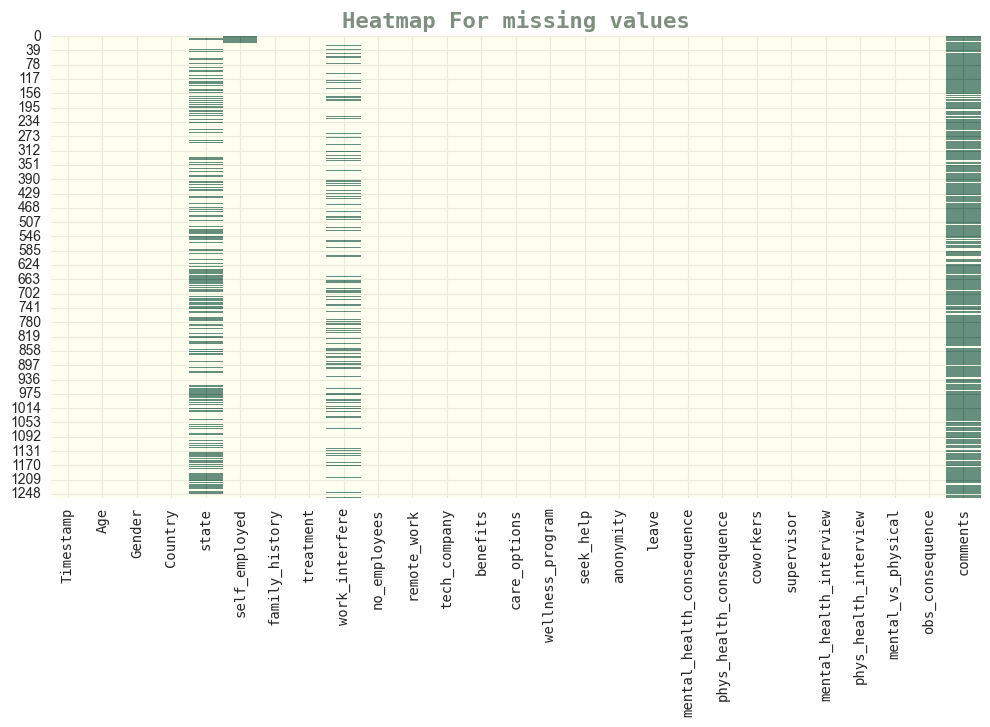

In [100]:
#heat map for Missing Values
#Defining Size 
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(df.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}

#setting Title
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)

#Show the Plot
plt.show()

In [101]:
# Check which columns have missing data and find the number of unique features for each column

# Concatenate the information about missing data, number of unique features, and data types
frame = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis=1, sort=False)

# Display the resulting DataFrame
frame

,0,1,2
Timestamp,0,884,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [102]:
# Drop columns that are irrelevant for the analysis or contain too much missing data

# List of columns to be dropped
columns_to_drop = ['state', 'comments', 'Timestamp']

# Iterate through each column in the list
for column in columns_to_drop:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Drop the specified column
        df = df.drop(columns=[column])

# Display the DataFrame after dropping columns
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [103]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [104]:
#Having a look at Country of Respondednts

print(df['Country'].value_counts())
print("\n \n")

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

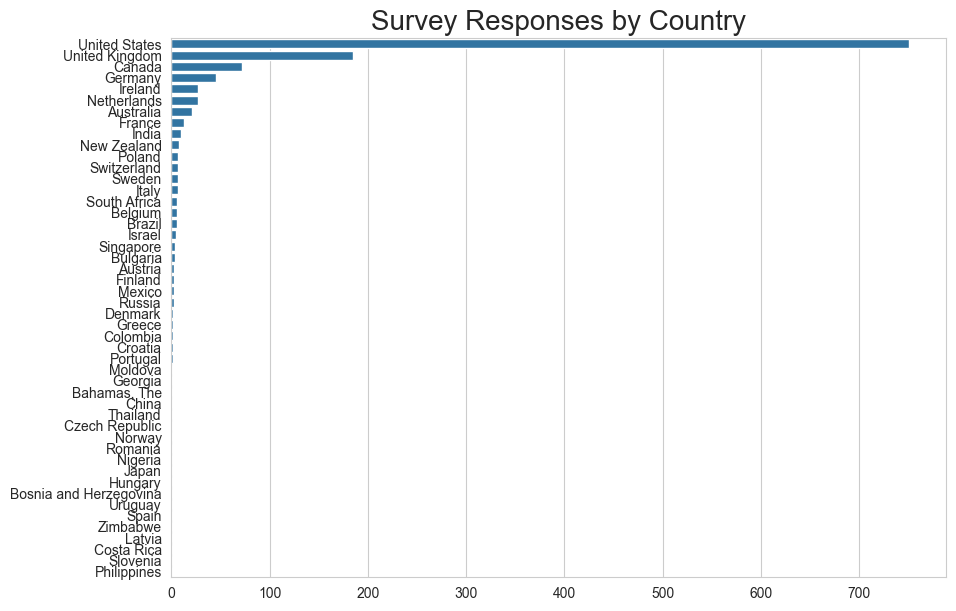

In [105]:
# Create a frequency chart for "country"
#Setting Figure Size
plt.figure(figsize=(10, 7))

#Setting Labels
sns.countplot(y='Country', order = df['Country'].value_counts().index, data=df)

#setting Titles
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')

#Show the Plot
plt.show()

In [106]:
#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

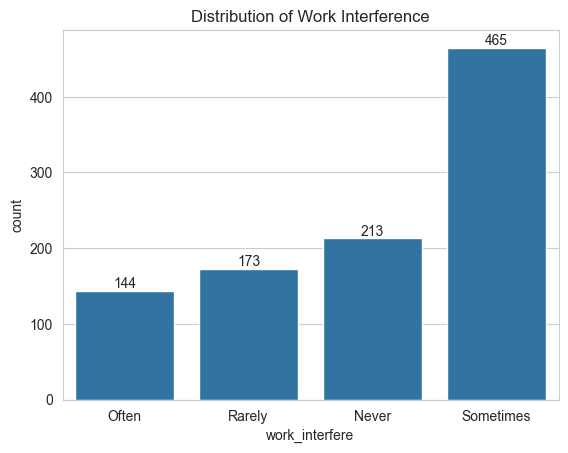

In [107]:
# Plot the distribution of 'work_interfere'

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [108]:
# Replace missing data in the 'work_interfere' column with its modal value
df['work_interfere'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['work_interfere'].values.reshape(-1, 1)))

# Replace missing data in the 'self_employed' column with its modal value
df['self_employed'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['self_employed'].values.reshape(-1, 1)))

# Display the first few rows of the DataFrame after imputing missing values
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


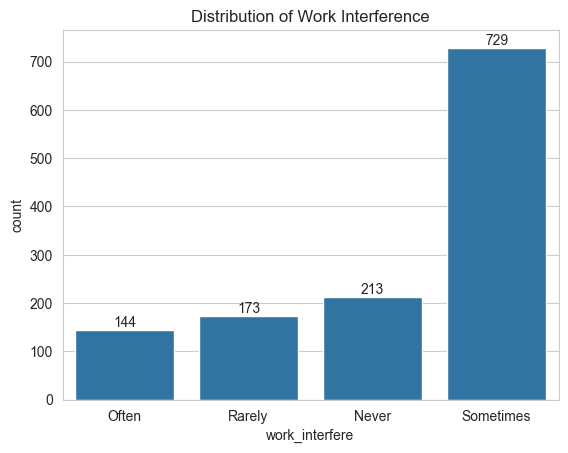

In [109]:
# Confirm there are no more null values in the 'work_interfere' column

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [110]:
# Check the unique values in the 'Gender' column

# Print the unique values in the 'Gender' column
print("Unique values in 'Gender' column:", df['Gender'].unique())

# Print an empty line and a separator for better readability
print('\n' + '-' * 92 + '\n')

# Check the number of unique values in the 'Gender' column

# Print the number of unique values in the 'Gender' column
print('Number of unique values in the "Gender" column:', df['Gender'].nunique())

Unique values in 'Gender' column: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

--------------------------------------------------------------------------------------------

Number of unique values in the "Gender" column: 49


In [111]:
# Cleaning up the 'Gender' column to make it more uniform

# Replace various gender values with standardized categories ('Male', 'Female', 'Other')
df['Gender'].replace( 
    ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail',
     'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'],
    'Male', inplace=True
)

df['Gender'].replace(
    ['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female',
     'cis-female/femme', 'Femake', 'Female (cis)', 'woman'],
    'Female', inplace=True
)

df["Gender"].replace(
    ['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne',
     'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah',
     'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p',
     'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'],
    'Other', inplace=True
)

# Print unique values in the 'Gender' column after cleaning
print("Unique values in 'Gender' column after cleaning:", df['Gender'].unique())

# Print unique values in the 'no_employees' column
print("Unique values in 'no_employees' column:", df['no_employees'].unique())

Unique values in 'Gender' column after cleaning: ['Female' 'Male' 'Other']
Unique values in 'no_employees' column: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']


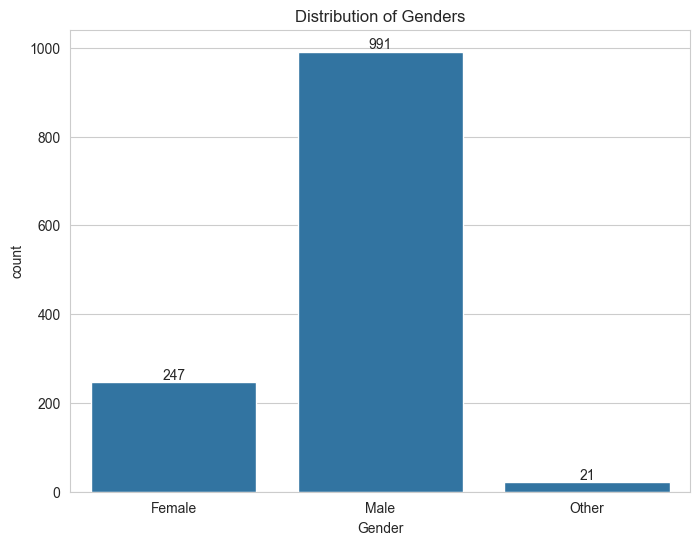

In [112]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a countplot for the 'Gender' column after cleaning and new categorization
gender_count_plot = sns.countplot(data=df, x='Gender')

# Add labels to the bars in the countplot with the count of occurrences
gender_count_plot.bar_label(gender_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Genders')

# Show the plot
plt.show()

In [113]:
#Confirmation that the dataset is clean
# Check for missing data in the DataFrame
missing_data_count = df.isnull().sum().sum()

# Check if there is any missing data
if missing_data_count == 0:
    print('There is no missing data.')
else:
    print('There is {} missing data.'.format(missing_data_count))

There is no missing data.


In [114]:
# Check for duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

# Check if there are any duplicate rows
if duplicate_count == 0:
    print('There is no duplicate row.')
else:
    print('There are {} duplicate rows.'.format(duplicate_count))
    
    # Remove duplicate rows from the DataFrame
    df.drop_duplicates(inplace=True)
    
    # Print a separator line
    print('-'*92)

# Check again for duplicate rows after removal
print('Number of duplicate rows after removal:', df.duplicated().sum())

There are 4 duplicate rows.
--------------------------------------------------------------------------------------------
Number of duplicate rows after removal: 0


In [115]:
#Check for unique values in 'Age' column
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [116]:
# Remove rows with 'Age' values outside the valid range (18 to 72)
df.drop(df[(df['Age'] < 18) | (df['Age'] > 72)].index, inplace=True)

# Print the unique values of the 'Age' column after removing invalid values
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


In [117]:
#Removing Negative Age Values

df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

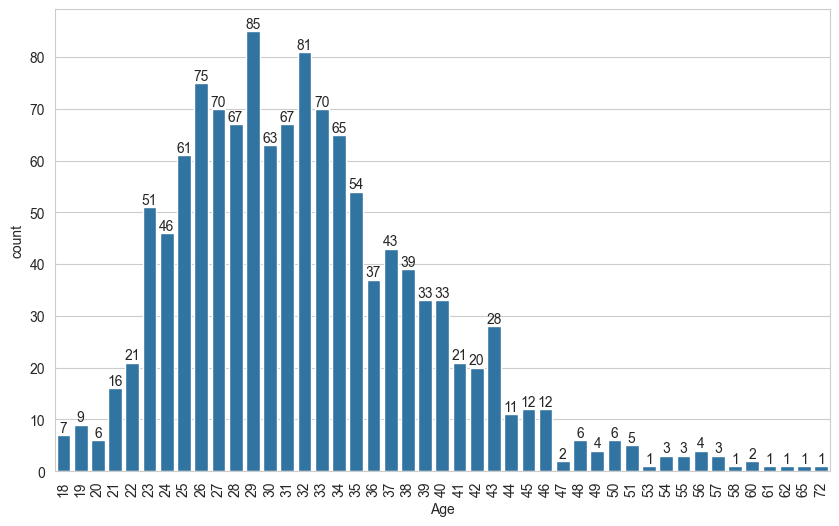

In [118]:
#Visualizing the distribution of Age 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot to visualize the distribution of 'Age'
age_range_plot = sns.countplot(data=df, x='Age')

# Add labels to the bars in the countplot with the count of occurrences
age_range_plot.bar_label(age_range_plot.containers[0])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

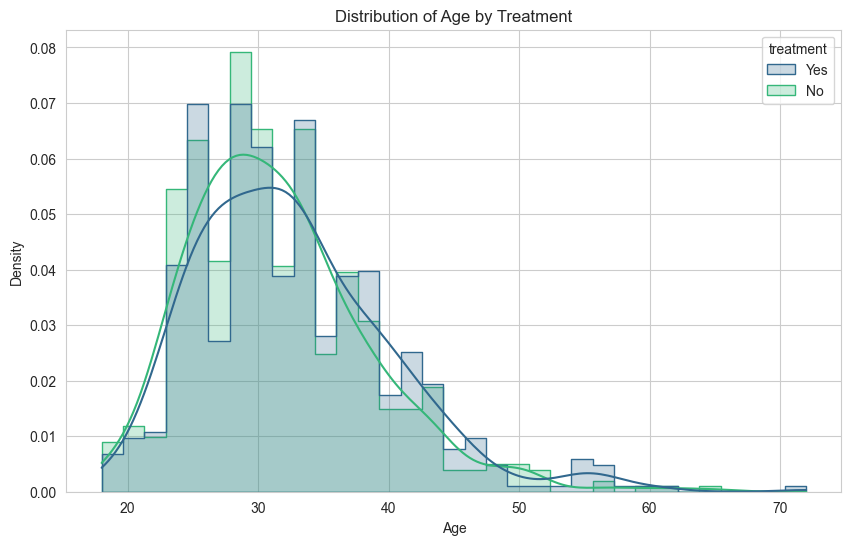

In [119]:
#Plot the Age distribution against Treatment, including the Kernel Density 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with kernel density estimate
sns.histplot(data=df, x='Age', hue='treatment', kde=True, element='step', stat='density', common_norm=False, palette='viridis')

# Set the title of the plot
plt.title('Distribution of Age by Treatment')

# Display the plot
plt.show()

In [120]:
# Exploratory Data Analysis

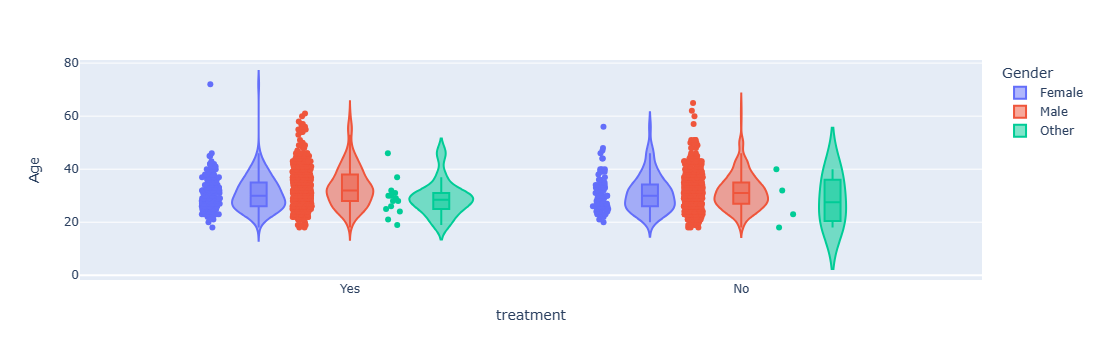

In [121]:
#Treatment analysis from the age-gender point
#Import Plotly.Express
import plotly.express as px

#Setting Values
fig = px.violin(df, y="Age", x="treatment", color="Gender", box=True, points="all")

#Show the Plot
fig.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\542690575.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




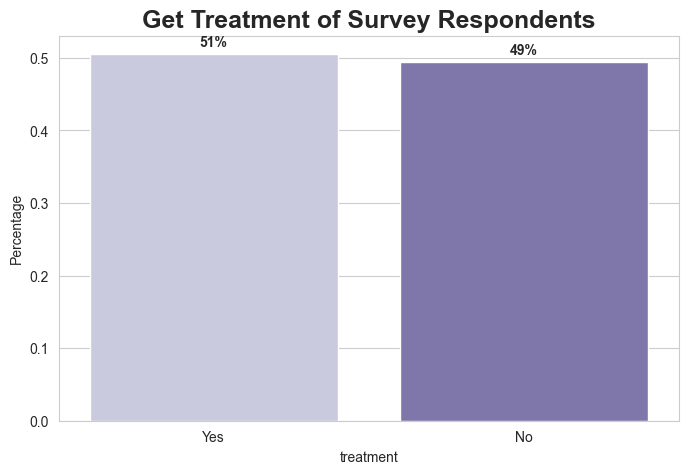

In [122]:
#Plotting whether People sought treatment for a mental health condition?'.

sns.set_style("whitegrid")

#Setting Up Figure
plt.figure(figsize = (8,5))

#Setting Up title
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')

# Calculate the percentage of each treatment category in the 'treatment' column
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

# Create a bar plot using seaborn for the top 10 treatment categories
ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')

# Annotate each bar with the corresponding percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

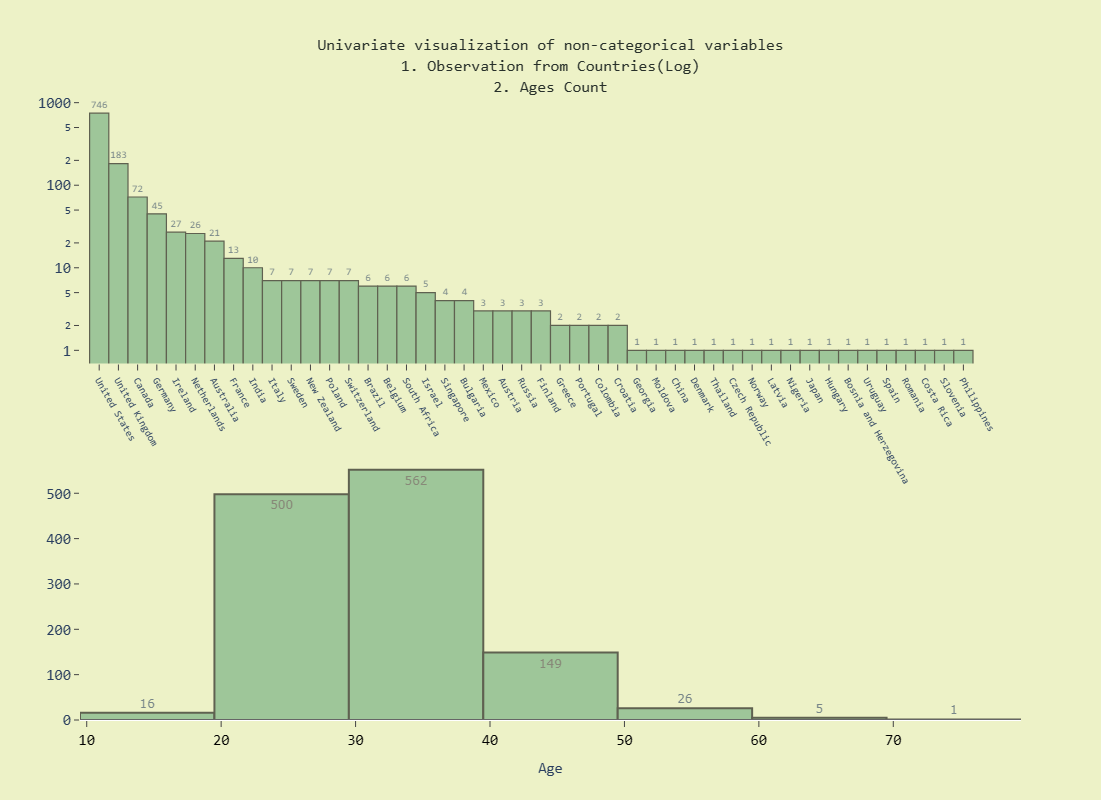

In [123]:
# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows = 2, cols=1)

# Add a bar plot to the first subplot
fig.append_trace(go.Bar(
                        y = df['Country'].value_counts(),
                        x = df['Country'].value_counts().index,
                        name = 'Observations from Countries (Log)',
                        text = df['Country'].value_counts(),
                        textfont = dict(size = 10,
                                        family = 'monospace'),
                        textposition = 'outside',
                        marker=dict(color="#6aa87b")
                        ), row=1, col=1)

# Add a histogram to the second subplot
fig.append_trace(go.Histogram(
                        x = df['Age'],
                        nbinsx = 8,
                        text = ['16', '500', '562', '149', '26', '5', '1'],
                        marker =  dict(color="#6aa87b")),
                        row=2, col=1)

# Update layout and settings for the first subplot
fig.update_xaxes(
        row=1, col=1,
        tickfont = dict(size=10, family = 'monospace'),
        tickmode = 'array',
        ticktext = df['Country'].value_counts().index,
        tickangle = 60,
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(type = 'log',
        row=1, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width= 1.2,
                  opacity=0.6,
                  row = 1, col = 1)

# Update layout and settings for the second subplot
fig.update_xaxes(range=[-1,48], row = 1, col = 1)
fig.update_xaxes(        
        title = dict(text = 'Age',
                     font = dict(size = 15,
                                 family = 'monospace')),
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace', color = 'black'),
        tickmode = 'array',
        ticktext = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width = 2,
                  opacity = 0.6,
                  row = 2, col = 1)

# Update overall layout settings
fig.update_layout(height=800, width=900,
                  title = dict(text = 'Univariate visualization of non-categorical variables<br>1. Observation from Countries(Log)<br>2. Ages Count',
                               x = 0.5,
                               font = dict(size = 16, color ='#27302a',
                               family = 'monospace')),
                  plot_bgcolor='#edf2c7',
                  paper_bgcolor = '#edf2c7',
                  showlegend = False)
# Display the plot
fig.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\3059148269.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\3059148269.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




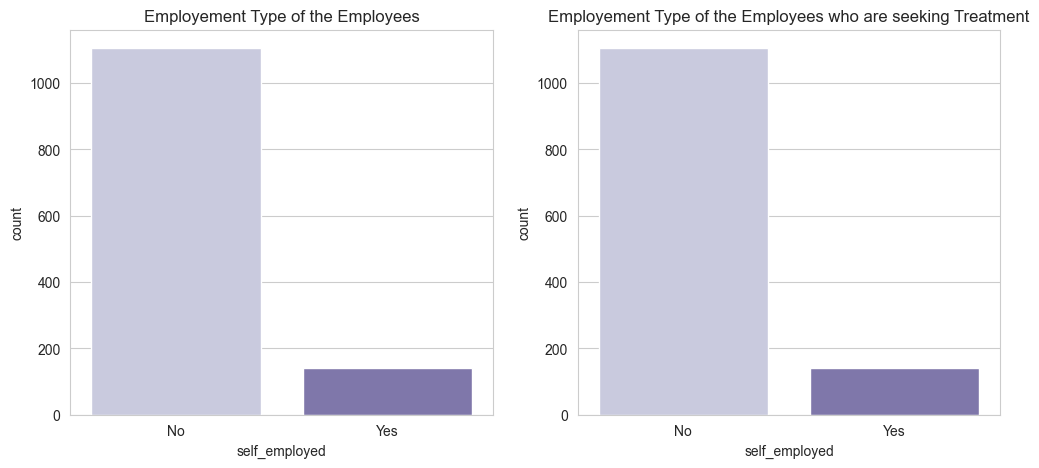

In [124]:
#Visualizing Employment type of Employees Seeking treatment

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot countplot for 'self_employed'
sns.countplot(x='self_employed', data=df, palette='Purples', ax=axes[0])
axes[0].set_title('Employement Type of the Employees')

# Plot countplot for 'treatment'
sns.countplot(x='self_employed', data=df, palette='Purples', ax=axes[1])
axes[1].set_title('Employement Type of the Employees who are seeking Treatment')

plt.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\3321747945.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


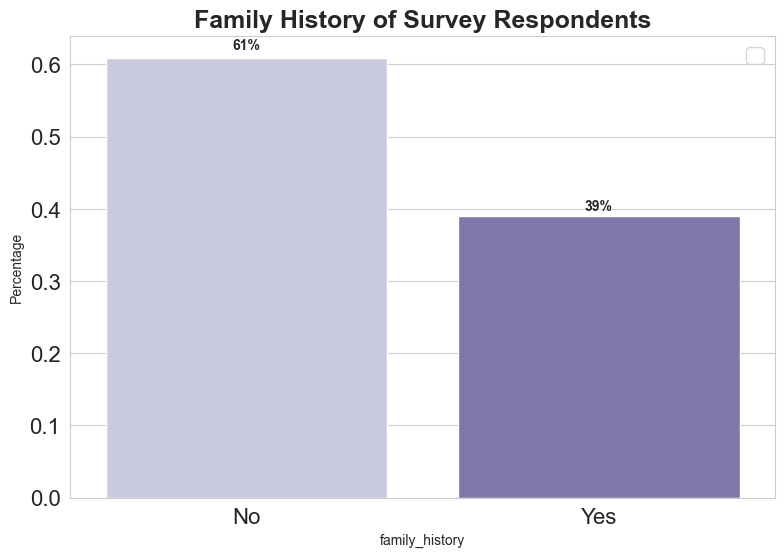

In [125]:
#Family History of Mental Illness of Survey Takers

plt.figure(figsize=(20, 6))

# Subplot 1: Barplot
plt.subplot(1, 2, 1)
eda_percentage = df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\2273100936.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


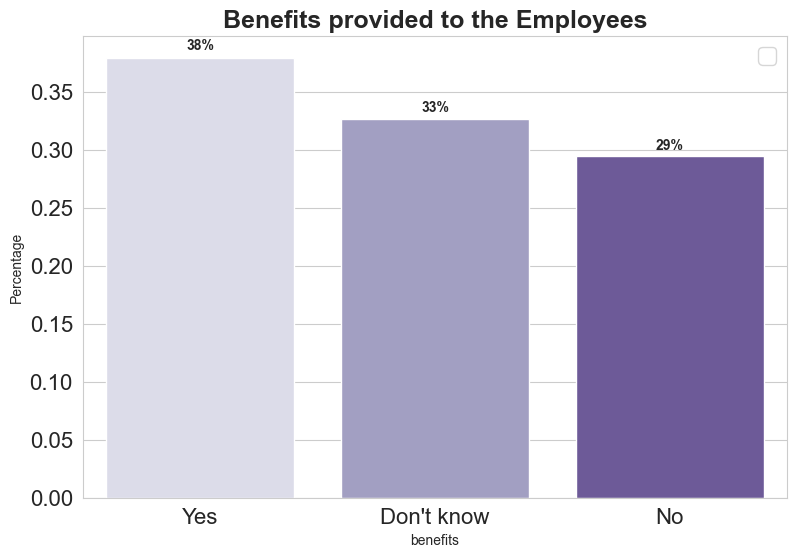

In [126]:
#Are there any Benefits Provided to those suffering with Mental Illness?
#Set Figure Size
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')

#Create a Bar Plot
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
#Set Title for Plot
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)



C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\558803623.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




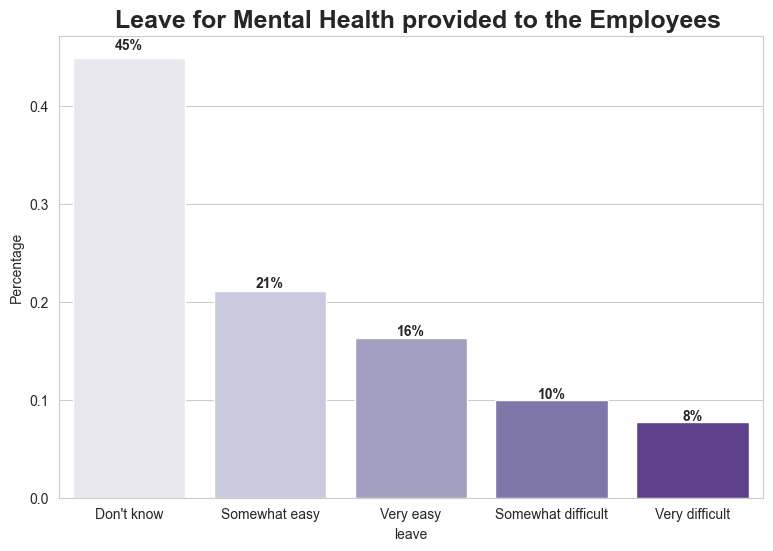

In [127]:
#How Easy it is to take a leave for this issue?
#Setting Figure Size
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
#Creating Bar Plot
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
#Set Title    
    plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_13080\2456327532.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Mental or Physical Health')

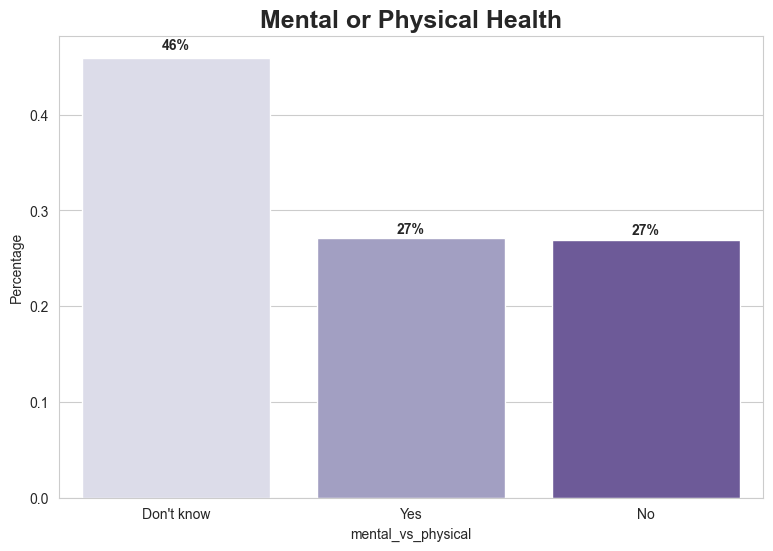

In [128]:
#Do you feel that your employer takes mental health as seriously as physical health?

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')

In [129]:
#Encode the dataset to make it viable for analysis
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                     'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                     'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                     'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                     'mental_vs_physical', 'obs_consequence']

# Create a new DataFrame 'df_encode' and encode categorical columns using LabelEncoder in a loop
df_encode = df.copy()  # Create a copy of the original DataFrame
for column in columns_to_encode:
    df_encode[column] = le.fit_transform(df_encode[column])

# Display information about the new encoded DataFrame
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1247 non-null   int64
 1   Gender                     1247 non-null   int32
 2   Country                    1247 non-null   int32
 3   self_employed              1247 non-null   int32
 4   family_history             1247 non-null   int32
 5   treatment                  1247 non-null   int32
 6   work_interfere             1247 non-null   int32
 7   no_employees               1247 non-null   int32
 8   remote_work                1247 non-null   int32
 9   tech_company               1247 non-null   int32
 10  benefits                   1247 non-null   int32
 11  care_options               1247 non-null   int32
 12  wellness_program           1247 non-null   int32
 13  seek_help                  1247 non-null   int32
 14  anonymity                  12

In [130]:
df_encode.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,1,1,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,2,1,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,0,1,1,...,0,0,1,1,1,2,2,2,0,0


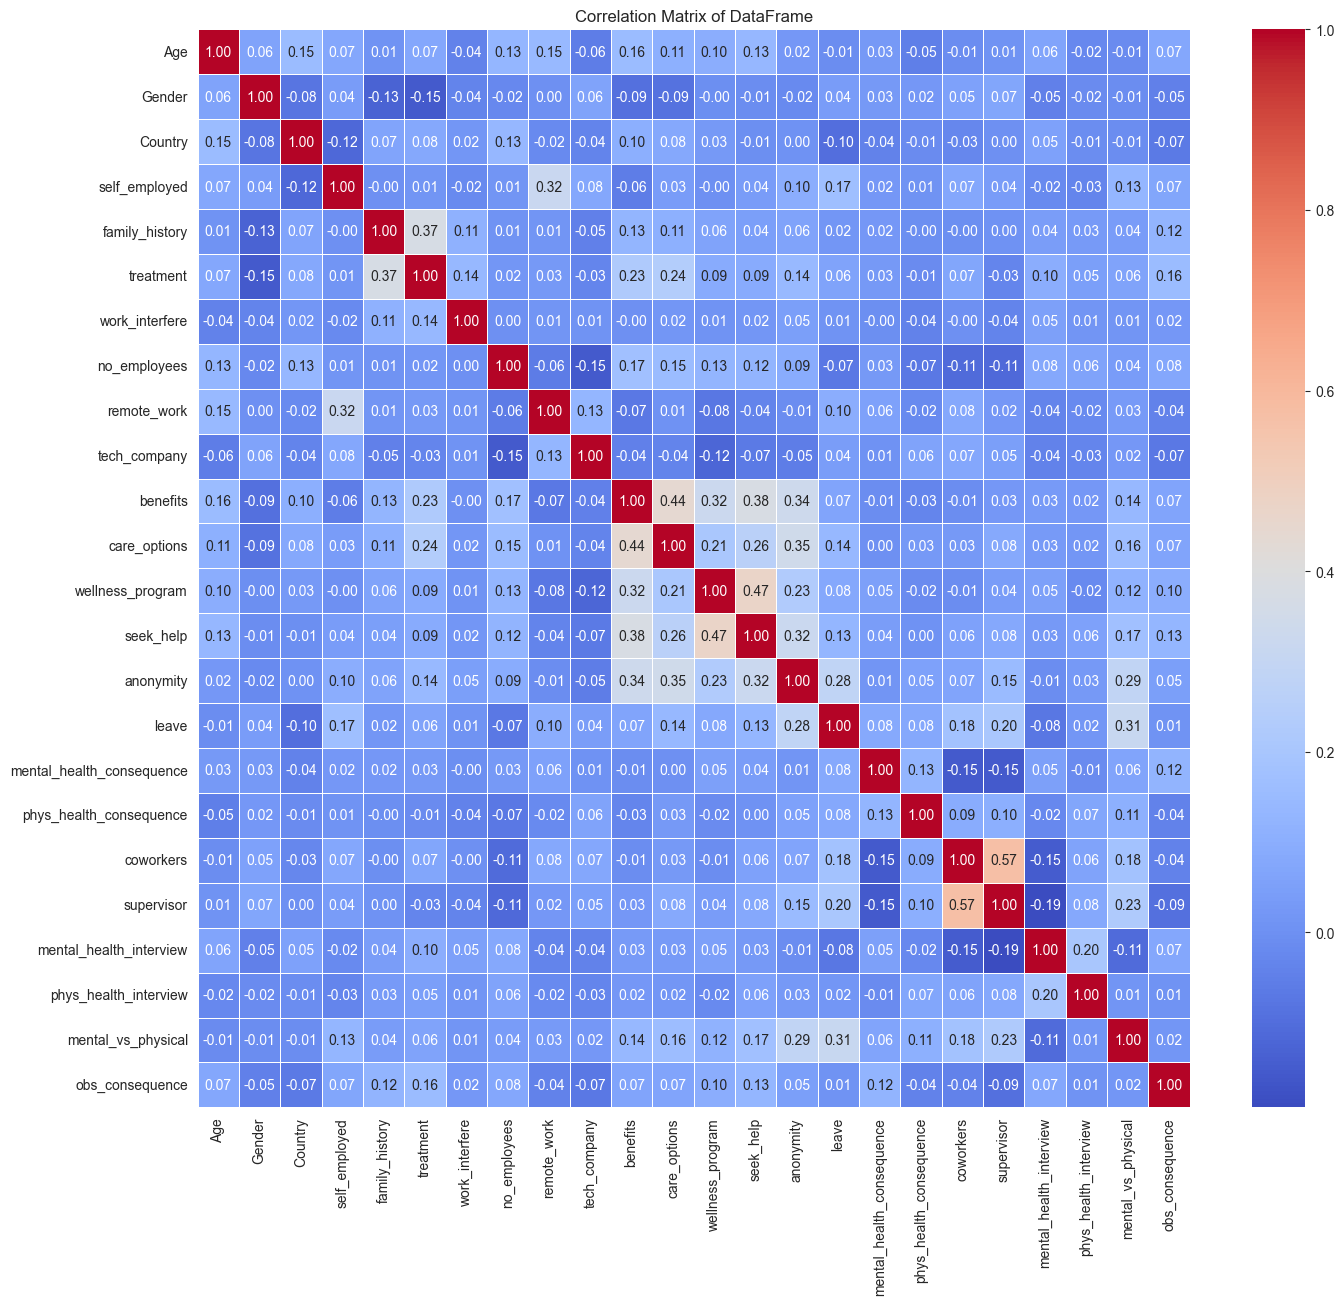

In [131]:
# Create a correlation matrix for the encoded DataFrame
correlation_matrix = df_encode.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix of DataFrame')

# Show the plot
plt.show()

In [133]:
# Create a list of independent variables and the dependent variable
independent_variables = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity', 'mental_health_interview']
dependent_variable = 'treatment'

# Extract the relevant columns for correlation analysis
data_for_correlation = df_encode[[dependent_variable] + independent_variables].dropna()

# Perform Pearson correlation test for each independent variable
correlation_results = {}
for independent_variable in independent_variables:
    # Calculate correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(data_for_correlation[independent_variable], data_for_correlation[dependent_variable])
    
    # Store results in a dictionary
    correlation_results[independent_variable] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

# Display the correlation results with column names
for variable, result in correlation_results.items():
    print(f"{variable} - Correlation with {dependent_variable}: {result['correlation_coefficient']:.4f}, p-value: {result['p_value']:.4f}")


Gender - Correlation with treatment: -0.1529, p-value: 0.0000
family_history - Correlation with treatment: 0.3747, p-value: 0.0000
work_interfere - Correlation with treatment: 0.1393, p-value: 0.0000
benefits - Correlation with treatment: 0.2251, p-value: 0.0000
care_options - Correlation with treatment: 0.2371, p-value: 0.0000
anonymity - Correlation with treatment: 0.1427, p-value: 0.0000
mental_health_interview - Correlation with treatment: 0.0957, p-value: 0.0007


Accuracy: 0.69
Confusion Matrix:
[[86 32]
 [45 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       118
           1       0.73      0.66      0.69       132

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.70      0.69      0.69       250



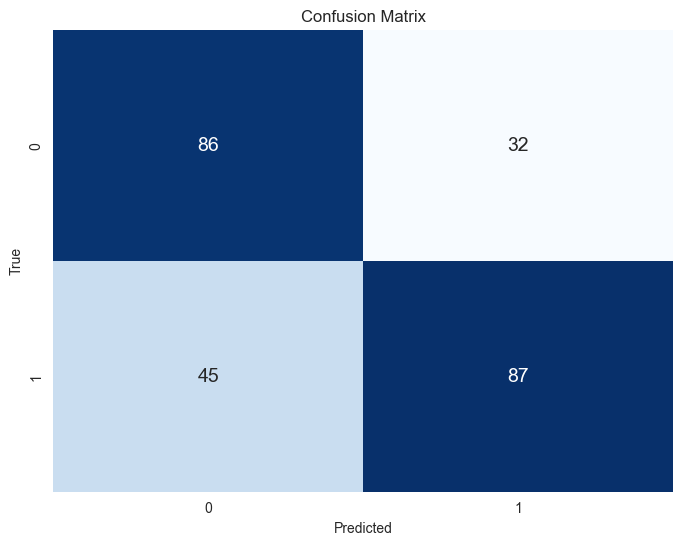

In [134]:
#Data Preprocessing
X = df_encode[independent_variables]  # Features
y = df_encode['treatment']  # Target variable

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

#Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [135]:
# Encoding Target
from sklearn.preprocessing import LabelEncoder
df.treatment = df.treatment.astype('category')
df.treatment = df.treatment.cat.codes
df.treatment.value_counts()



# Train and Test set

X = df.drop('treatment', axis =1)
y = df.treatment

cols = X.columns

encoder = LabelEncoder()
for col in cols:
    encoder.fit(X[col])
    X[col] = encoder.transform(X[col])

# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

Best parameters :  {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear'}
Accuracy : 67.60%
Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       131
           1       0.66      0.67      0.66       119

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250

Confusion Matrix : 


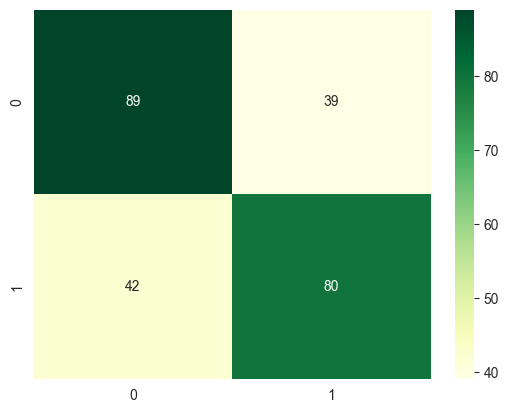

In [143]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from warnings import filterwarnings

# Ignore warnings during execution
filterwarnings("ignore")

# Define a pipeline with a scaler and logistic regression
steps = [('scaler', StandardScaler()), ('log_reg', LogisticRegression())]
pipeline = Pipeline(steps)

# Define the parameters to search over in the grid search
parameters = dict(log_reg__solver=['newton-cg', 'lbfgs', 'liblinear'],
                  log_reg__penalty=['l2'],
                  log_reg__C=[100, 10, 1.0, 0.1, 0.01])

# Create a GridSearchCV instance
cv = GridSearchCV(pipeline,
                  param_grid=parameters,
                  cv=5,
                  scoring='accuracy',
                  n_jobs=-1,
                  error_score=0.0)

# Fit the model to the training data
cv.fit(X_train, y_train)

# Make predictions on the test data using the best model from grid search
y_pred = cv.predict(X_test)

# Calculate the accuracy of the model on the test data
log_accuracy = accuracy_score(y_pred, y_test) * 100

# Print the best parameters found by grid search
print('\033[1m' + 'Best parameters : ' + '\033[0m', cv.best_params_)

# Print the accuracy of the model on the test data
print('\033[1m' + 'Accuracy : {:.2f}%'.format(log_accuracy) + '\033[0m')

# Print the classification report of the model on the test data
print('\033[1m' + 'Classification report : ' + '\033[0m\n', classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_pred, y_test)
print('\033[1m' + 'Confusion Matrix : ' + '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm, cmap='YlGn', annot=True, fmt='d')
plt.show()


Text(50.722222222222214, 0.5, 'Actual')

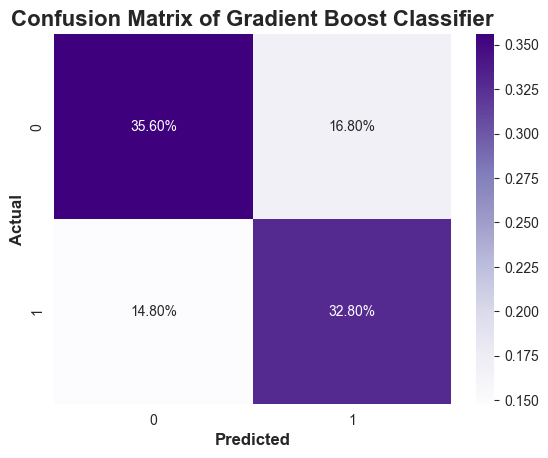

In [142]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a Gradient Boosting Classifier instance
gbc = GradientBoostingClassifier()

# Train the classifier on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
pred = gbc.predict(X_test)

# Generate a confusion matrix using the true labels (y_test) and predicted labels
cf_matrix = confusion_matrix(y_test, pred)

# Create a heatmap of the confusion matrix normalized by the sum of all values
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Purples')

# Set title, x-axis label, and y-axis label for the heatmap
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)


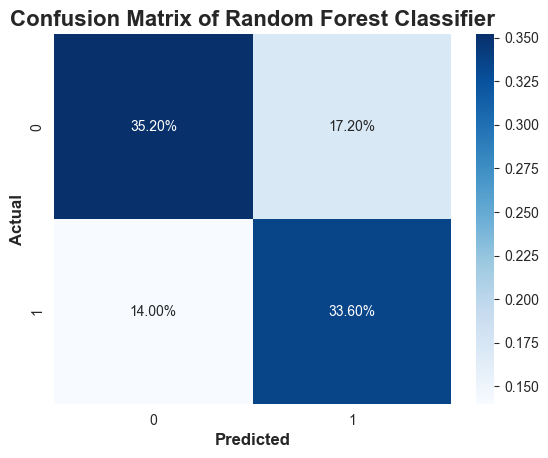

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Create and Train Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make Predictions
pred_rf = rfc.predict(X_test)

# Calculate Confusion Matrix
cf_matrix_rf = confusion_matrix(y_test, pred_rf)

# Visualize Confusion Matrix for Random Forest
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()
